In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


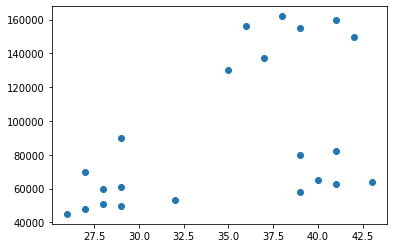

In [23]:
plt.scatter(df['Age'] , df['Income($)'])

In [62]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age' ,'Income($)']])
y_predict

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [64]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [27]:
df['Cluster'] = y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


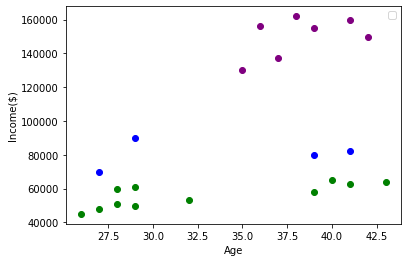

In [32]:
#Without Scaling 
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'purple')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [44]:
#Scaling the features
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


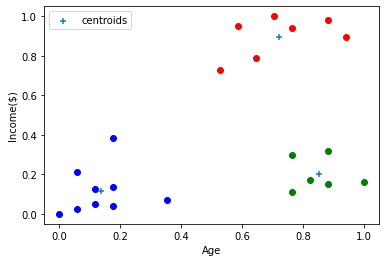

In [71]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])

df['Cluster1'] = y_predict

df1 = df[df['Cluster1'] == 0]
df2 = df[df['Cluster1'] == 1]
df3 = df[df['Cluster1'] == 2]

plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'blue')
plt.scatter(df3.Age , df3['Income($)'] , color = 'red')
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[: , 1] , marker = '+', label = 'centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Plot

In [77]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [78]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2766936276300278,
 0.22020960864009395,
 0.16858512236029757,
 0.13976844995388157,
 0.10497488680620906]

Text(0, 0.5, 'Sum of Squared Error')

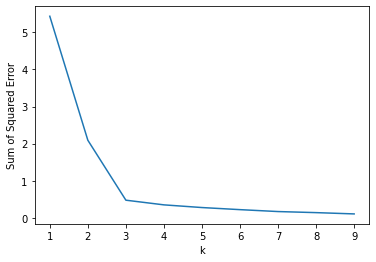

In [81]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')